In [3]:
# TO RUN IT: CHANGE MY PATH
%matplotlib inline
%load_ext autoreload
%autoreload 2

# change path if necessary
import sys
my_path = r'C:\Users\utente\Documents\GitHub\Project1_ML'
sys.path.insert(0,my_path + r'\code\COMMON')

# imports
import numpy as np 
import matplotlib.pyplot as plt

from implementations import *
from labels import idx_2labels
from costs import *
from optimize_hyperparams import *
from cross_validation import *
from step_wise import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

#### load raw data

In [4]:
from proj1_helpers import load_csv_data 
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

#### handle outliers

In [34]:
from outliers import handle_outliers
X0, y = handle_outliers(input_data_raw, y_raw, -999, 'median')

ind_back, ind_sig = idx_2labels(y, [-1,1])
y[ind_back] = 0

-999 are replaced by the median value of the feature


In [6]:
# get feature names 
f_names_init = list(np.genfromtxt(my_path + r'/data/train.csv', delimiter=",", dtype=str, max_rows = 1)[2:])

In [7]:
# adding power transformations
degree = 3

# build polynomial basis function
phi = build_poly(X0, degree)

all_candidates = np.delete(phi, 0, 1)  # delete first column of phi

# adding logarithm names
feat_names = []
for i in range(len(f_names_init)):
    for d in range(degree):
        feat_names.append(f_names_init[i] + '_pw_' + str(d+1))

In [8]:
# adding logarithmic transformation of masses
all_candidates = np.concatenate((all_candidates, np.log(1+np.abs(X0[:,0])).reshape(len(X0),1)),axis =1)
all_candidates = np.concatenate((all_candidates, np.log(1+np.abs(X0[:,1])).reshape(len(X0),1)),axis =1)
all_candidates = np.concatenate((all_candidates, np.log(1+np.abs(X0[:,2])).reshape(len(X0),1)),axis =1)
all_candidates = np.concatenate((all_candidates, np.log(1+np.abs(X0[:,5])).reshape(len(X0),1)),axis =1)

# adding logarithm names
feat_names.append('log(DER_mass_MMC)')
feat_names.append('log(DER_mass_transverse_met_lep)')
feat_names.append('log(DER_mass_vis)')
feat_names.append('log(DER_mass_jet_jet)')

In [9]:
# list of feature names and indices
features = []
for i in range(len(feat_names)):
    features.append((i,feat_names[i]))

print(all_candidates.shape)
print(len(features))
print(*features, sep='\n')

(250000, 94)
94
(0, 'DER_mass_MMC_pw_1')
(1, 'DER_mass_MMC_pw_2')
(2, 'DER_mass_MMC_pw_3')
(3, 'DER_mass_transverse_met_lep_pw_1')
(4, 'DER_mass_transverse_met_lep_pw_2')
(5, 'DER_mass_transverse_met_lep_pw_3')
(6, 'DER_mass_vis_pw_1')
(7, 'DER_mass_vis_pw_2')
(8, 'DER_mass_vis_pw_3')
(9, 'DER_pt_h_pw_1')
(10, 'DER_pt_h_pw_2')
(11, 'DER_pt_h_pw_3')
(12, 'DER_deltaeta_jet_jet_pw_1')
(13, 'DER_deltaeta_jet_jet_pw_2')
(14, 'DER_deltaeta_jet_jet_pw_3')
(15, 'DER_mass_jet_jet_pw_1')
(16, 'DER_mass_jet_jet_pw_2')
(17, 'DER_mass_jet_jet_pw_3')
(18, 'DER_prodeta_jet_jet_pw_1')
(19, 'DER_prodeta_jet_jet_pw_2')
(20, 'DER_prodeta_jet_jet_pw_3')
(21, 'DER_deltar_tau_lep_pw_1')
(22, 'DER_deltar_tau_lep_pw_2')
(23, 'DER_deltar_tau_lep_pw_3')
(24, 'DER_pt_tot_pw_1')
(25, 'DER_pt_tot_pw_2')
(26, 'DER_pt_tot_pw_3')
(27, 'DER_sum_pt_pw_1')
(28, 'DER_sum_pt_pw_2')
(29, 'DER_sum_pt_pw_3')
(30, 'DER_pt_ratio_lep_tau_pw_1')
(31, 'DER_pt_ratio_lep_tau_pw_2')
(32, 'DER_pt_ratio_lep_tau_pw_3')
(33, 'DER_met_ph

In [10]:
all_candidates,_ ,_ = standardize(all_candidates)

In [11]:
# model parameters
model = dict()
model['method'] = 'rr' 
model['loss'] = 'loglikelihood'
model['lambda_'] = 0

# model hyperparameter
model['gamma'] = 0

model['debug_mode'] = 1

# R2 type
R2_method = 'McFadden' # 'loss', 'Tjur' or 'McFadden' 

# estimate R2 error through cross validation (1 or 0)
cv = 1
model['k_fold'] = 10

In [12]:
best_R2adj, idx_features = stepwise(model, R2_method, all_candidates, features, y, cv)

-------------------------------------------------
Feature chosen:  DER_mass_transverse_met_lep_pw_1 (index : 3 )
-------------------------------------------------
Feature chosen:  DER_deltaeta_jet_jet_pw_2 (index : 13 )
-------------------------------------------------
Feature chosen:  PRI_tau_pt_pw_1 (index : 39 )
-------------------------------------------------
Feature chosen:  DER_mass_transverse_met_lep_pw_2 (index : 4 )
-------------------------------------------------
Feature chosen:  log(DER_mass_MMC) (index : 90 )
-------------------------------------------------
Feature chosen:  DER_mass_MMC_pw_1 (index : 0 )
-------------------------------------------------
Feature chosen:  PRI_lep_eta_pw_2 (index : 52 )
-------------------------------------------------
Feature chosen:  PRI_jet_leading_eta_pw_2 (index : 73 )
-------------------------------------------------
Feature chosen:  PRI_tau_pt_pw_2 (index : 40 )
-------------------------------------------------
Feature chosen:  DER_m

In [14]:
import winsound
frequency = 2000  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [15]:
results_r2_stepwise(best_R2adj[:len(best_R2adj)-1], idx_features)

step 1 : R2 adjusted = 0.921882239588
step 2 : R2 adjusted = 0.928197356762
step 3 : R2 adjusted = 0.933647642502
step 4 : R2 adjusted = 0.936307679222
step 5 : R2 adjusted = 0.938631563252
step 6 : R2 adjusted = 0.944136084298
step 7 : R2 adjusted = 0.945598169909
step 8 : R2 adjusted = 0.946876417958
step 9 : R2 adjusted = 0.947774572059
step 10 : R2 adjusted = 0.948525077553
step 11 : R2 adjusted = 0.949168291786
step 12 : R2 adjusted = 0.950066298566
step 13 : R2 adjusted = 0.950703673145
step 14 : R2 adjusted = 0.951212756781
step 15 : R2 adjusted = 0.951666031369
step 16 : R2 adjusted = 0.952000985104
step 17 : R2 adjusted = 0.952286215627
step 18 : R2 adjusted = 0.952539920471
step 19 : R2 adjusted = 0.953076835604
step 20 : R2 adjusted = 0.953280204673
step 21 : R2 adjusted = 0.953853782169
step 22 : R2 adjusted = 0.954360267148
step 23 : R2 adjusted = 0.954591821981
step 24 : R2 adjusted = 0.954795769708
step 25 : R2 adjusted = 0.954915543791
step 26 : R2 adjusted = 0.95511536

In [17]:
phi = all_candidates[:, idx_features]
np.shape(phi)

(250000, 66)

tested lambda_:  [  1.00000000e-05   1.07226722e-05   1.14975700e-05   1.23284674e-05
   1.32194115e-05   1.41747416e-05   1.51991108e-05   1.62975083e-05
   1.74752840e-05   1.87381742e-05   2.00923300e-05   2.15443469e-05
   2.31012970e-05   2.47707636e-05   2.65608778e-05   2.84803587e-05
   3.05385551e-05   3.27454916e-05   3.51119173e-05   3.76493581e-05
   4.03701726e-05   4.32876128e-05   4.64158883e-05   4.97702356e-05
   5.33669923e-05   5.72236766e-05   6.13590727e-05   6.57933225e-05
   7.05480231e-05   7.56463328e-05   8.11130831e-05   8.69749003e-05
   9.32603347e-05   1.00000000e-04   1.07226722e-04   1.14975700e-04
   1.23284674e-04   1.32194115e-04   1.41747416e-04   1.51991108e-04
   1.62975083e-04   1.74752840e-04   1.87381742e-04   2.00923300e-04
   2.15443469e-04   2.31012970e-04   2.47707636e-04   2.65608778e-04
   2.84803587e-04   3.05385551e-04   3.27454916e-04   3.51119173e-04
   3.76493581e-04   4.03701726e-04   4.32876128e-04   4.64158883e-04
   4.97702356e-04

------------------------------------------ cross validation with lambda_ =  0.00132194114847
------------------------------------------ cross validation with lambda_ =  0.00141747416293
------------------------------------------ cross validation with lambda_ =  0.00151991108295
------------------------------------------ cross validation with lambda_ =  0.00162975083462
------------------------------------------ cross validation with lambda_ =  0.00174752840001
------------------------------------------ cross validation with lambda_ =  0.00187381742286
------------------------------------------ cross validation with lambda_ =  0.00200923300257
------------------------------------------ cross validation with lambda_ =  0.00215443469003
------------------------------------------ cross validation with lambda_ =  0.00231012970008
------------------------------------------ cross validation with lambda_ =  0.00247707635599
------------------------------------------ cross validation with lambd

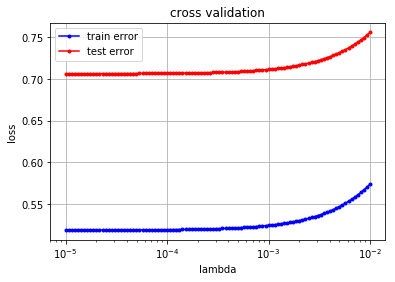

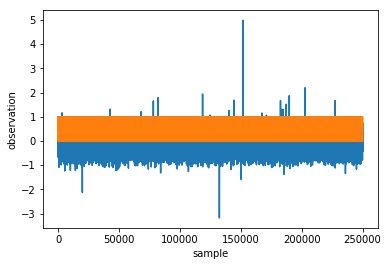

In [35]:
# ridge regression parameters
arg_rr = dict()
arg_rr['method'] = 'rr'
arg_rr['loss'] = 'rmse'
arg_rr['k_fold'] = 10

# optimization parameters
lambda_min = -5
lambda_max = -2
lambda_steps = 100

# optimize lambda_
w_opt, loss_tr, loss_te, lambda_opt, success_rate = optimize_lambda(y, phi, lambda_min, lambda_max, lambda_steps, arg_rr, debug_mode=1)

# plot results
plt.figure()
plt.plot(phi.dot(w_opt))
plt.plot(y)
plt.xlabel('sample')
plt.ylabel('observation')
plt.show()



In [36]:
print(success_rate)

0.689124


In [64]:
wrr, loss = ridge_regression(y, phi, 0.0)

Y = predict_labels(wrr, phi)


In [65]:
pos = 0
neg = 0
for i in range (len(y)):
    if Y[i] == y[i]:
        pos += 1
    else:
        neg += 1
print(pos)
print(neg)

success_rate = pos/(pos+neg)
print(success_rate)

172274
77726
0.689096


In [ ]:
nope, test_data, ids = load_csv_data(my_path + r'data/test.csv', sub_sample=False)

print("Data loaded! Shape: ")
print(np.shape(test_data))